In [1]:
import pandas as pd 
import ast 
from datasets import load_dataset
import matplotlib.pyplot as plt
dataset = load_dataset ('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

691434     95592.0
403931     75000.0
173014     55000.0
186485    137500.0
184508     53000.0
618745    106100.0
618722     65000.0
684690     80500.0
476059     90000.0
294017    115575.0
Name: salary_year_avg, dtype: float64

<Axes: >

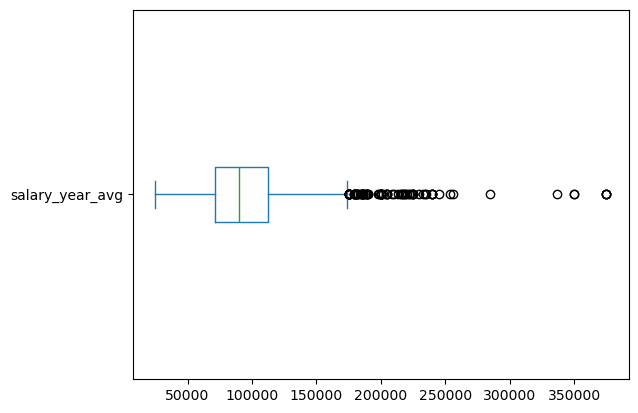

In [3]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

/var/folders/_9/k43n03391fv7sbk8m_zv9xd40000gn/T/ipykernel_15452/1793068675.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


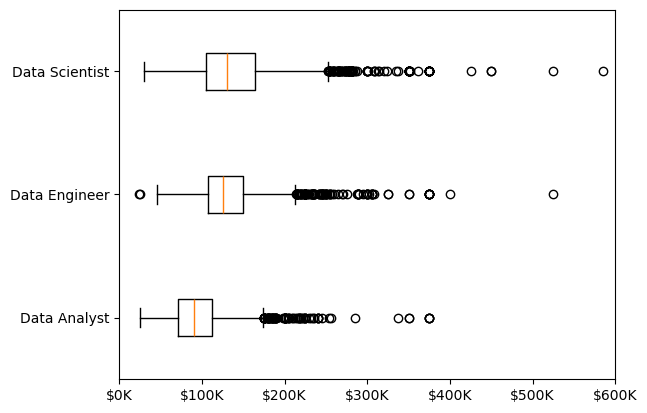

In [4]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg']   for job_title in job_titles]
plt.boxplot(job_list, labels = job_titles, vert = False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, post: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()
